<span style="color:blue">
    
# **_South Korea COVID-19 early pandemic response: an analysis of Korea CDC data from 2020_**</span>

**Introduction**
My goal for this project was 

**Data source**
* 11 datasets made available from Korea CDC and local governments, via Kaggle: https://www.kaggle.com/datasets/kimjihoo/coronavirusdataset

**Background**

The first case of Covid-19 in the US and Korea were confirmed on the same date: January 20th 2020. In mid-March, the US and South Korea had about the same number of COVID deaths--about 90. However, the trajectory of the disease and the government response diverged thereafter. In April, South Korea lost 85 people to COVID, while the US lost 62,000 (Source: (4)). While the US government Covid response has been widely criticised, the Korean government response has been touted as an example from which other countries should learn. This preliminary analysis identifies key government policies, strategies and execution of policies that appear to have made the difference. 

Prior to the availability of vaccines, control of diseases transmissible by respiratory droplets typically relies on the key public health functions listed below. This analysis focuses on these areas:
    1) identification of cases 
    2) determination of mode of transmission, and
    3) implementation of measures to prevent transmission among known cases as well as potential cases, based on known mode of transmission (eg. isolation and tracing contacts of Covid cases, masking and social distancing among the general public) and emphasizing protection of high risk groups

**Overall assumptions**

| Basic assumptions and caveats | Context | 
| -------- | -------- |
| As the goal of the assignment is to help to prepare ones home country (ie. United States) for the next pandemic wave through insights derived from analysis of KCDC data, political and cultural considerations are beyond the scope of report recommendations (eg. level of acceptance for Covid-related policies) | ---- |
| Data provided are reliable and represent the most complete data that were available from the routine health information system, and clarifications on definitions have already been made. | Data quality during emergencies, such as a pandemic, can often be compromised. For example, low mortality rates could simply reflect broken data systems in which mortality data are not documented for lack of data collection manpower. In real world scenarios, clarifications regarding data quality and reliability would need to be made with the agency collecting the data _prior_ to analysis. In this report, data definition ambiguity will be described as relevant, including assumptions and justifications thereof. |
| This is a preliminary report addressing high-level questions, which will be followed by an in-depth analysis that is being conducted by a team of data scientists to confirm findings and provide detailed recommendations. I had only one day to conduct this preliminary analysis as a prelude to an internal team planning meeting. | In reality, as one of the top data scientist of the country, I probably would not be analysing the data myself and rather might be strategically leading a team of analysts.  |   
| The current period is 2023, so analysis focuses on government action in the first six months of a future pandemic |   | * In the PatientInfo dataset there is a "status" variable with the possible values of "isolated," "released," and "deceased." Because the reference point appears to be with respect to a hospital, given the information available, the deceased likely refers only to hospital deaths. | For this analysis it was assumed that the documented cases and deaths were the only ones that existed |   
| Policies provided in the dataset represent the full list of nationals policies that were successfully implemented | -------- |

<span style="color:blue">
    
## **_Part I: Guiding questions_** </span>

* What are the demographic characteristics (sex, age, infection mode) of the population... 
    - ... most at risk for infection in Jan-June 2020?
    - ... most at risk for COVID-related death in Jan-June 2020?
    - What are policy implications of these characteristics?
    

* How did the frequency of COVID cases and deaths (trajectory) change over the Jan-June 2020 period? 
    * To what extent was the Korean government successful in controlling the epidemic during the first six months? Case counts by sex, age and mode over time.

* What Korean government policies preceded periods of lowered infection rates during the January and June 2020 period?
    * What were the major COVID policies during this period?
    * What policies and implementation of policies appear to have enabled the degree of success achieved? Especially policies that were different from the US response.

<span style="color:blue">
    
## **_Part I: Brief data assessment_**</span>

The first step is to get a high level understanding of the 11 datasets on the Korean Covid-19 epidemic (ie. available variables, data quality) to shape analysis approach and identify the datasets and variables that may help to answer analysis questions. The notebook covid_prelim_view.ipynb contains basic information about each dataset.

In [1]:
# Import libraries and verify current directory
execfile("startup.py")
execfile("covid_fns.py")

current_dir = os.getcwd()
print(current_dir)

# Read data and create list of dfs
covidcsv = [
    "Case.csv",
    "PatientInfo.csv",
    "Policy.csv",
    "Region.csv",
    "SearchTrend.csv",
    "SeoulFloating.csv",
    "Time.csv",
    "TimeAge.csv",
    "TimeGender.csv",
    "TimeProvince.csv",
    "Weather.csv",
]
df_names = [
    "case",
    "pt_info",
    "policy",
    "region",
    "trend",
    "seoulfloating",
    "time",
    "timeage",
    "timegender",
    "timeprov",
    "weather",
]

# Create dictionary w covidcsv element as value and corresponding df_name element as key
covid_dct = {}  # create blank dictionary to house 11 datafranes
for file in covidcsv:
    covid_dct[df_names[covidcsv.index(file)]] = pd.read_csv(file, header=0)

C:\Users\yashi\Dropbox\00 Turing Projects\_Turing repo clone\repo_ext\yashin_ext\covid_project_keep


<span style="color:blue">

## **_Part III: Preliminary overview of data for analysis_** </span>

**_Key relevant datasets and potentially useful variables_**
* PatientInfo (5164 observations and 12 variables)
    * No documentation on whether dataset contains all patients ever tested for Covid or a subset of these. However, based on the fact that the confirmed_date variable contains only 3 out of 5164 entries missing, this analysis will consider PatientInfo to be a dataset of patients who received a confirmation Covid test (ie. who received two positive Covid tests). 
* Policy (61 observations and 7 variables)
* Time (163 observations and 7 variables), TimeAge (1089 observations and 5 variables), TimeGender (242 observations and 5 variables), TimeProvince (2770 observations and 6 variables)
* Timeframe of datasets: January - June 2020 (confirmed in Section 1.4)

**_Potentially useful variables:_**

| **Dataset/Variables** | **Variable Definition/-_Notes_** | **Dataset/Variables** | **Variable Definition/-_Notes_** |
| ---- | ---- |----| ---- |
|**PatientInfo dataset** |  |**Time dataset** |  |
|sex|_gender_|test|accumulated number of tests \n -(_unclear whether includes both 1st and confirmation tests_)|
|age|_- age variable is grouped_|negative| the accumulated number of negative results|
|confirmed_date | the date of being confirmed|confirmed| the accumulated number of positive results|
|released_date| the date of being released|released| the accumulated number of releases|
|deceased_date| the date of being deceased|deceased| the accumulated number of deceases (sic)|
|state| isolated/released/deceased|**Timeage dataset**|-_status data available since 2mar20_| 
|        - isolated |being isolated in the hospital|age| the age of patients|
|        - released| being released from the hospital|confirmed| the accumulated number of the confirmed|
|        - deceased| being deceased|deceased| the accumulated number of the deceased|
| -contact_number| the number of contacts with people|**Timegender dataset**|-_status data available since 2mar20_|
| -infection_case| the case of infection|sex| the gender of patients|
| **Case dataset**| |confirmed| the accumulated number of the confirmed|
|case_id |the ID of the infection case |deceased| the accumulated number of the deceased|
|province |Special City/Metropolitan City/Province (-do)|**TimeProvince dataset**|  |
|city |City (-si)/Country (-gun)/District (-gu)|date| YYYY-MM-DD |
|group |TRUE: group infection/ FALSE: not group|time| Time |
|infection_case|name of group or other cases |province |province in South Korea|
|confirmed|accumulated number of the confirmed |confirmed | accumulated nbr of the confirmed in the province; -_data available since 21feb20_|
|latitude |latitude of group|released|accumulated number of released in the province; -_data available since 5mar20_|
|longitude|longitude of group|deceased|accumulated number of deceased in the province; -_data available since 5mar20_|
|**Policy**| -_all policies, since it is unclear which ones may have had the greatest impact_ | ||| |

<span style="color:blue">
    
### **_Data cleaning_**</span> 


In [2]:
# Check for missing data
print("\nMissing Data Report")

for i in covid_dct:
    print(f"\n{i}")  # name of df
    if covid_dct[i].isnull().values.any():
        print(
            f"Number of missing rows: \n{covid_dct[i].isnull().sum()} \n"
            f"\nPercent of missing rows: \n{round(covid_dct[i].isnull().sum()/len(covid_dct[i])*100,1)}%)"
        )


Missing Data Report

case

pt_info
Number of missing rows: 
patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64 

Percent of missing rows: 
patient_id             0.0
sex                   21.7
age                   26.7
country                0.0
province               0.0
city                   1.8
infection_case        17.8
infected_by           73.9
contact_number        84.7
symptom_onset_date    86.6
confirmed_date         0.1
released_date         69.3
deceased_date         98.7
state                  0.0
dtype: float64%)

policy
Number of missing rows: 
policy_id      0
country        0
type           0
gov_policy     0
detail         2
start_d

<span style="color:blue">
    
#### **_Findings: Missing data_**</span> 

* Missing data: Two datasets have >1% missing data--they are shown below. No changes to data made at this stage.

**Patient_Info (N=5164):**

| Patient_info Variables: | Number missing | Percentage missing | 
| -------- | -------- | -------- | 
| sex | 1112 | 21.7% |  
| age  | 1380 | 26.7% |  
| city | 94 | 1.8% |  
| infection_case| 919 | 17.8% |  
| infected_by | 3819 | 73.9% |  
|contact_number  | 4374 | 84.7% |  
|symptom_onset_date  | 4475 | 86.6% |  
| released_date | 3578 | 69.3% |  
| deceased_date | 5099 | 98.7% |  


**Policy (N=61):**

| Policy Variables: | Number missing | Percentage missing | 
| -------- | -------- | -------- | 
| detail | 2 | 3.3% | 
| end_date | 37 | 60.7% | 


In [3]:
# Check for full record duplicates
print(" ")
for key in covid_dct:
    print(
        f"Duplicate records in {key}: \t{covid_dct[key].duplicated().sum()} \t({round(covid_dct[key].duplicated().sum()/len(pd.DataFrame(covid_dct[key]))*100,1)}%)"
    )

## Check for duplicate unique identifier in PatientInfo dataset--
# Read data and convert date columns into correct format
pt_info = pd.read_csv(
    "PatientInfo.csv",
    header=0,
    parse_dates=[
        "symptom_onset_date",
        "confirmed_date",
        "released_date",
        "deceased_date",
    ],
    dayfirst=True,
)

# Check for duplicate unique identifier
pt_info[pt_info.duplicated("patient_id")]  # patient_id == 1200012238 (row 1589)
display(pt_info[pt_info.duplicated("patient_id", keep=False)])
pt_info[pt_info["patient_id"] == 1200012238]
pt_info.drop([1589], inplace=True)  # delete duplicate
display(pt_info[pt_info["patient_id"] == 1200012238])

 
Duplicate records in case: 	0 	(0.0%)
Duplicate records in pt_info: 	0 	(0.0%)
Duplicate records in policy: 	0 	(0.0%)
Duplicate records in region: 	0 	(0.0%)
Duplicate records in trend: 	0 	(0.0%)
Duplicate records in seoulfloating: 	0 	(0.0%)
Duplicate records in time: 	0 	(0.0%)
Duplicate records in timeage: 	0 	(0.0%)
Duplicate records in timegender: 	0 	(0.0%)
Duplicate records in timeprov: 	0 	(0.0%)
Duplicate records in weather: 	0 	(0.0%)


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1588,1200012238,female,20s,Korea,Daegu,Icheon-dong,overseas inflow,NaN,NaN,NaN,2020-06-17,NaT,NaT,isolated
1589,1200012238,female,20s,Korea,Daegu,Nam-gu,overseas inflow,NaN,NaN,NaN,2020-06-17,NaT,NaT,isolated


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1588,1200012238,female,20s,Korea,Daegu,Icheon-dong,overseas inflow,NaN,NaN,NaN,2020-06-17,NaT,NaT,isolated


<span style="color:blue">
    
#### **_Findings: Duplicates_** </span>

* One duplicate ID found--both were of same age group, gender, province and infection mode but different cities. 
* Action: dropped row/index 1589; kept 1588. Missing data will be included and clearly labelled in analysis. 


<span style="color:blue">
    
## **_Part IV: Analysis_** </span>

<a id='section_id'></a>

In [4]:
# Prep PatientInfo for analysis

# Replace blank spaces with missing values
pt_info["symptom_onset_date"] = pt_info["symptom_onset_date"].replace(" ", pd.NaT)

# Convert symptom_onset_date to datetime format
pt_info["symptom_onset_date"] = pd.to_datetime(
    pt_info["symptom_onset_date"], format="%d-%m-%Y"
)

In [5]:
# Dataset timeframe: Confirmation of month of June is last month for timeframe
date_cols = pt_info.iloc[:, [9, 10, 11, 12]]
max_dates = [pt_info[date].max() for date in date_cols]
display(
    max_dates
)  # all dates except for deceased run until end of June, so dataset timeframe confirmed Jan-Jun 2020

[Timestamp('2020-06-28 00:00:00'),
 Timestamp('2020-06-30 00:00:00'),
 Timestamp('2020-06-28 00:00:00'),
 Timestamp('2020-05-25 00:00:00')]

<span style="color:blue">
    
### **_Notes on interpreting PatientInfo data_** </span>   

* Timeframe for PatientInfo dataset confirmed to be Jan-Jun 2020
* Nearly all cases (rows)$^*$ in the PatientInfo dataset have a "confirmed_date." Thus this analysis will refer to PatientInfo cases as confirmed cases.  
* The PatientInfo dataset is incomplete in a critical geographical area: it is missing the city of Daegu, in in North Gyeongsang Province, the city that experienced multiple times the number of cases as the rest of the country during the January to June 2020 period. According to the Kaggle contributer that helped to assemble the datasets available for this analysis, the PatientInfo data was derived from "each local government site," and the Daegu data are not complete because the Daegu local government "does not officially provide the information of all patients in Daegu." However, some Daegu data derived from secondary sources were nevertheless included in this dataset. Thus, visualisations using PatientInfo data will be referenced with a "Daegu excluded" note, though a more accurate description would be that data from Daegu are incomplete. 
        
$^*$except for 3 observations

<span style="color:blue">
    
### **_Demographic characteristics of population confirmed to have Covid_** </span>

In [6]:
# Describe demographic info of population in patient_info (ie. 1st 6 mos of Covid epidemic)
# Recode missing values into -1 to help interpretation

for col in pt_info:
    pt_info[col].fillna("missing", inplace=True)

# Subset demographic variables: age, sex, state columns (and patient_id just in case)
age_sex_st = pt_info[["age", "sex", "state", "patient_id"]].copy()

In [7]:

age_sex_st.groupby("age")["sex"].value_counts(normalize=True).mul(100).rename("percent").reset_index()  # reset_index needed bc otherwise index of original Series will remain



,age,sex,percent
0,0s,male,57.575758
1,0s,female,42.424242
2,100s,female,100.000000
3,10s,male,61.797753
4,10s,female,38.202247
5,20s,female,50.779510
6,20s,male,48.997773
7,20s,missing,0.222717
8,30s,male,53.728489
9,30s,female,46.271511


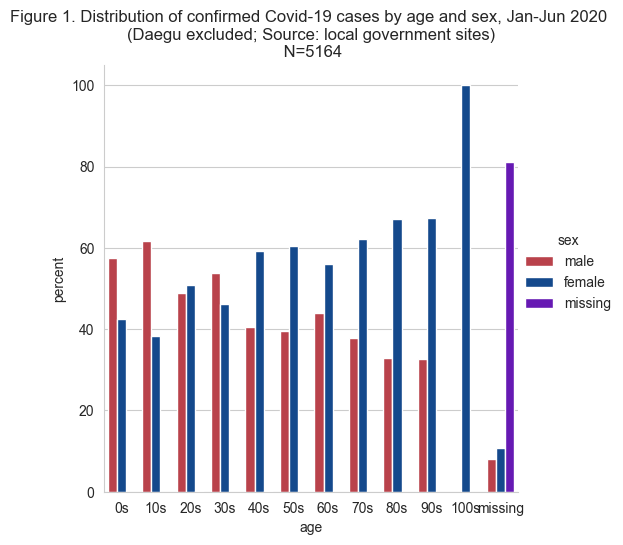

In [8]:
# Bar chart showing Covid cases by age and gender
bar_x_hue_p(
    age_sex_st,
    "age",
    "sex",
    "Figure 1. Distribution of confirmed Covid-19 cases by age and sex, Jan-Jun 2020 \n(Daegu excluded; Source: local government sites)\n N=5164",
)

<span style="color:blue">
    
#### **_Findings: Distribution by age and sex_**</span>
* while denominators are not available to determine if rates of confirmed cases are different by gender, the gender ratio in the population is close to 1:1 for age groups < 70**
* a greater proportion of men (vs women) were confirmed cases for ages < 20 and those between 30 and 40
* a greater proportion of women (vs men) were confirmed cases for ages > 40--though for ages >70, the pattern could be misleading due to the gender imbalance
* Was there a negatively correlated relationship between gender and age? 
    - It appears so in the chart above, but relationship was not significant (Kendall's tau--test effectively dichotomises age so does not use all available information)

** https://en.wikipedia.org/wiki/Demographics_of_South_Korea 

<span style="color:blue">

#### **_Is there a negative correlation between sex and age?_** </span>


In [9]:
# Method #1: compute Kendall's tau\n

corr, p = kendalltau(age_sex_st["age"], age_sex_st["sex"])

print(f"Kendall Tau: {corr}, p = {p}")

# Method #2: rank biserial correlation coefficient - no Python library found

Kendall Tau: 0.37834988014305576, p = 1.004616094981255e-236


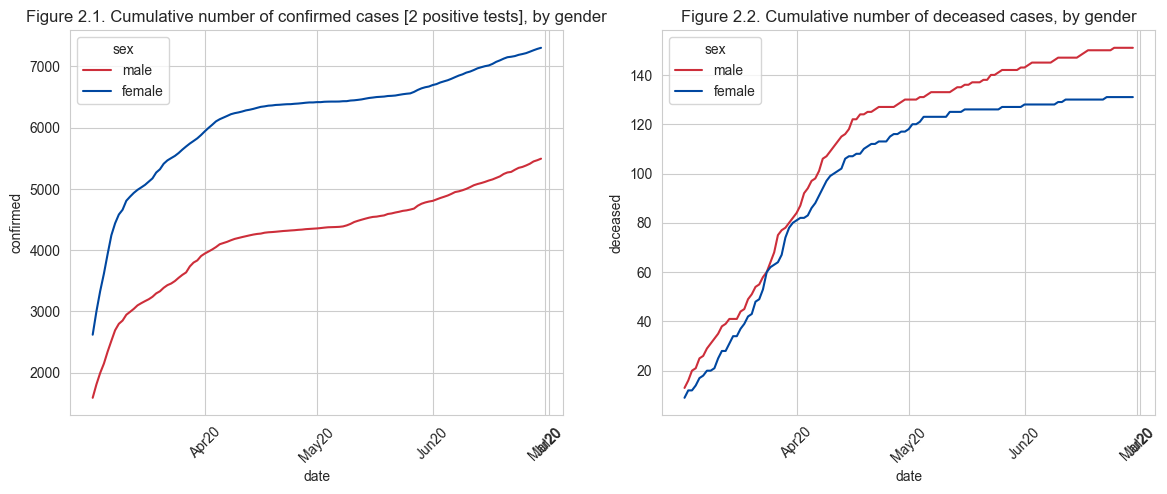

In [10]:
# Time Gender

# Read data and convert date columns into correct format
time_gen = pd.read_csv(
    "TimeGender.csv",
    header=0,
    parse_dates=["date"],
    dayfirst=True,
)


sns.set_style("whitegrid")

fig, axes = plt.subplots(
    1,
    2,
    figsize=(14, 5),
)

palette = ["#CD2E3A", "#0047A0", "grey", "yellow"]

title = [
    "Figure 2.1. Cumulative number of confirmed cases [2 positive tests], by gender",
    "Figure 2.2. Cumulative number of deceased cases, by gender",
]

stack_order_2 = ["confirmed", "deceased"]

xtx_mar_jul = ["2020-03-01", "2020-04-01", "2020-05-01", "2020-06-01", "2020-07-01"]

xtx_labels = ["Mar20", "Apr20", "May20", "Jun20", "Jul20"]

for i in range(2):
    sns.lineplot(
        data=time_gen,
        x="date",
        y=stack_order_2[i],
        hue="sex",
        palette=palette,
        ax=axes[i],
    ),
    axes[i].set_title(title[i]),
    axes[i].set_xticks(xtx_mar_jul),
    axes[i].set_xticklabels(xtx_labels, rotation=45)

plt.show()

<span style="color:blue">

#### **_Findings: Increase in number of confirmed and deceased by gender (Jan - Jun 2020)_**</span>

* At all age groups, more women were confirmed to to have Covid, compared to men. Since globally, gender is not an established risk factor for Covid infection, one could speculate that proportionately, women might be more likely to get tested, or that men may have had higher exposure to Covid-19. 
* More men died of Covid-related disease, at all age groups, compared to women. This is consistent with the fact that male gender is an established risk factor for mortality in the general population with Covid-19. 
* **Policy implications:** 
    * Either hypothesis for differential numbers of confirmed cases between genders could lead to targeted campaigns. Such campaigns could focus on lowering barriers for men to get tested, or they could focus on helping men avoid activities with increased exposure to Covid. The key to designing policies and strategies to reduce infecton rates is to quickly identify infection cases. By implementing and rapidly scaling up widespread testing as early as possible, including the data infrastructure to swiftly make data available to decisionmakers, the Korean government had the means to identify and address risk factors. 
    
    * One of the earliest Covid policies was an open data policy on patient information (see Figure 7), enabled by infectious disease prevention legislation that was written based on lessons from the 2015 MERS epidemic. This policy provided contact tracing teams access to data from medical, pharmacy facility visit records, cellular GPS data, credit card transaction logs, and closed-circuit television (see Section 1.5.2 for timing of open data policy and Sources (3) for additional information). Successful implementation of such a strategy relies on strong public-private partnership and public trust. For instance, to support contract tracing efforts at high-traffic facilities like bars and gyms, private sector partners instituted manual sign-in sheets, which were then replaced by QR codes on June 10th (see KI-Pass system, Section 1.5.2). To maintain data privacy concerns, data were automatically deleted after 14 days (Source: https://ourworldindata.org/covid-exemplar-south-korea). Drawing from lessons from the 2015 MERS epidemic, the government also increased transparency, by requiring local governments to send prompt alerts, such as emergency texts, to disclose the recent whereabouts of new patients (Sources: (4)).

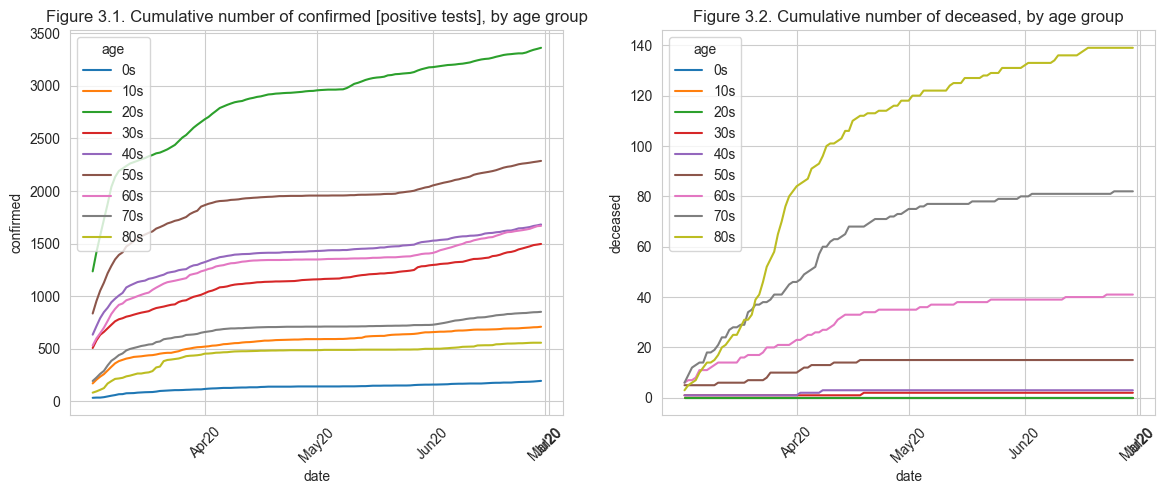

In [11]:
# Time_age
# Read data and convert date columns into correct format
time_age = pd.read_csv(
    "TimeAge.csv",
    header=0,
    parse_dates=["date"],
    dayfirst=True,
)

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

title_conf_dec_by_age = [
    "Figure 3.1. Cumulative number of confirmed [positive tests], by age group",
    "Figure 3.2. Cumulative number of deceased, by age group",
]

# time series of confirmed by age group
for i in range(2):
    sns.lineplot(
        data=time_age,
        x="date",
        y=stack_order_2[i],
        hue="age",
        ax=axes[i],
    )
    axes[i].set_title(title_conf_dec_by_age[i])
    axes[i].set_xticks(xtx_mar_jul)
    axes[i].set_xticklabels(xtx_labels, rotation=45)

<span style="color:blue">
    
#### **_Findings: Increase in number of confirmed cases and deceased over time by age_**</span>

* While the lack of denominators (ie. data on the total population for each age group) do not allow for clearer statements of relative risk levels, 
  age groups with higher numbers of confirmed cases are consistent with age groups we might expect to generally have higher exposures (eg. working age adults, younger adults that are likely more social): 
    * The cumulative number of confirmed cases was highest among people in the 20s and 50s age groups, followed by the 40s, 60s and 30s age groups. 
    * The lowest cumulative number of confirmed cases were among minors*** (under 20) and the older age groups (70s and above).
* The four oldest age groups demonstrate a consistent pattern of increased mortality with increasing age. 

* **Policy implications:** 
    * The general policy implication would be to target policies to strengthen infection prevention measures among higher risk groups (60+ ), ensure that infection prevention policies are consistent with risk groups and risk modes, and continue to monitor cases and outcomes to understand the effectiveness of and adherence to policies.
    * To this regard, the Korean government passed administrative orders limiting gatherings at institutions providing services for the elderly. 

*** Schools went online in April 2020.

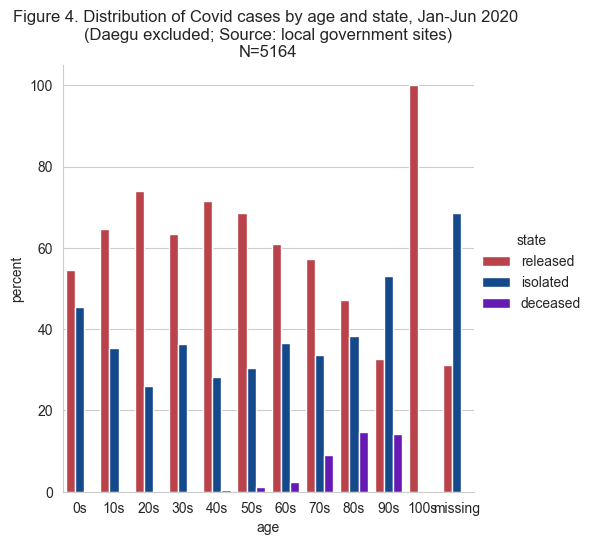

In [12]:
# Bar chart showing Covid cases by age and state
bar_x_hue_p(
    age_sex_st,
    "age",
    "state",
    "Figure 4. Distribution of Covid cases by age and state, Jan-Jun 2020 \n(Daegu excluded; Source: local government sites)\nN=5164",
)



<span style="color:blue">

#### **_Findings: Distribution by age and state_** </span>

* Among age groups <= 80s, a greater proportion of confirmed cases were released than isolated. 
* The proportion of deceased at each age group is barely visible among 30 and 40 year olds. A visible proportion rises starting with the 50-year old group, peaking among 80 year olds, though at the higher age groups this could be due to the larger population of women compared to men.
* All confirmed cases are either isolated, released or deceased.   

* **Policy implications:** 
    - Based on the definition for the "state" variable* and the fact that this variable contained no missing data, one understands that persons with confirmed Covid status during this period were isolated. According to an Atlantic article, during this period, the most severe cases were isolated in a hospital (mandatory), moderately ill cases were isolated at a dorm where they were monitored, and asymptomatic contacts of recently diagnosed cases were asked to isolate at home and health officials check in twice daily to monitor symptoms (see Sources (4)). In contrast, in the US, the CDC issued recommendations for the number of days people with Covid should isolate for, but there is no monitoring or enforcement mechanism. 
    - Following the 2015 MERS outbreak, the Korean government built the capacity for hospital isolation, investing in specialised hospital isolation rooms with negative pressure. 
    
\* state is a measure of the patient status--each case is either isolated, released or deceased. 

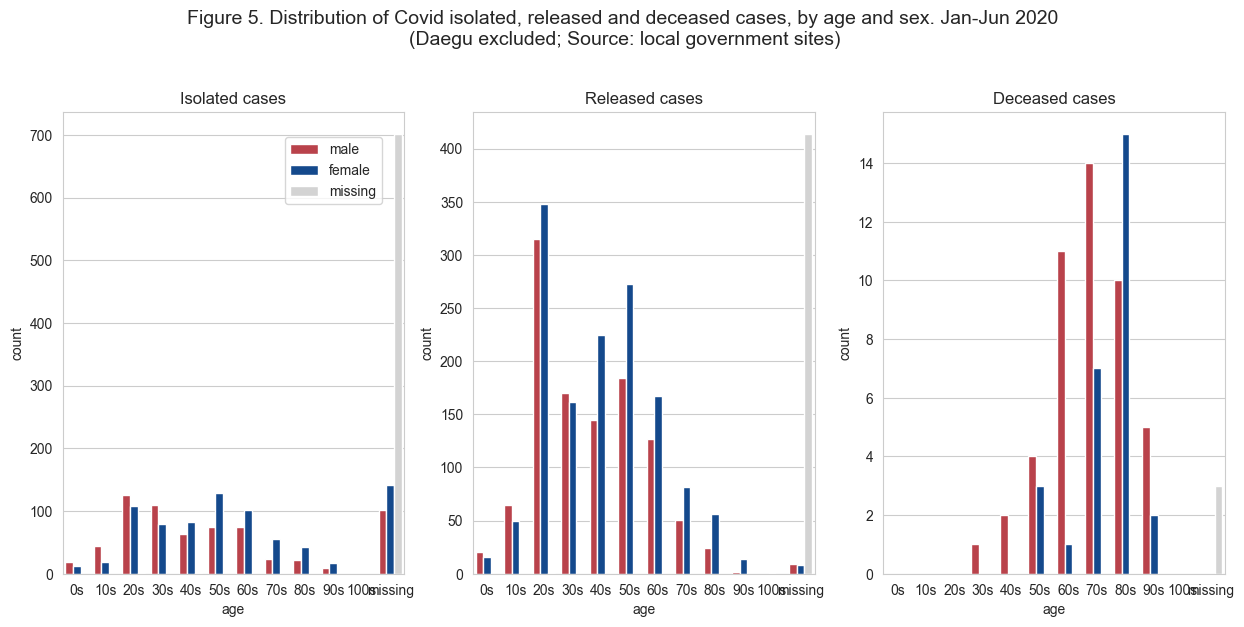

In [13]:
# What is the demographic profile of population by "state"?
age_sex_st["state"].unique()  # 'released', 'deceased', 'isolated'

# set order of state into logical order
order = ["isolated", "deceased", "released"]

# create dictionary of dataframes for each state and create count variable
df_by_state = {}  # create dictionary with 3 dataframes
for i in order:
    df_by_state[i] = age_sex_st[age_sex_st["state"] == i]
    locals()[i + "_ct"] = (
        df_by_state[i]
        .groupby("age")["sex"]
        .value_counts()
        .rename("count")
        .reset_index()
    )

# create barcharts for each
bar_age_sex_by_status(df_by_state)

<span style="color:blue">

#### **_Findings: Age and sex by state_** </span>
* Among age groups <30, more men than women were isolated while more women were released, reflecting the higher mortality among men. 
* The _Deceased cases_ chart is consistent with the higher risk levels of male gender and older age groups. 

<span style="color:blue">

### **_Infection mode_**</span>

* **Assumption** The "infection_case" is defined ambiguously as "the case of infection." This analysis assumes, based on its contents, that this variable refers to a combination of mode of transmission (eg. contact with patient, overseas inflow) and specific infection clusters (eg. names of specific churches, clubs, and nursing homes). The fact that specific clusters are listed by name suggests that "contact with patient" refers to known contact with an individual patient, rather than a cluster. This said, it is unclear how a person who was infected at a 2nd or 3rd degree contact with a member of an infection cluster might be classified. 

<Figure size 600x370 with 0 Axes>

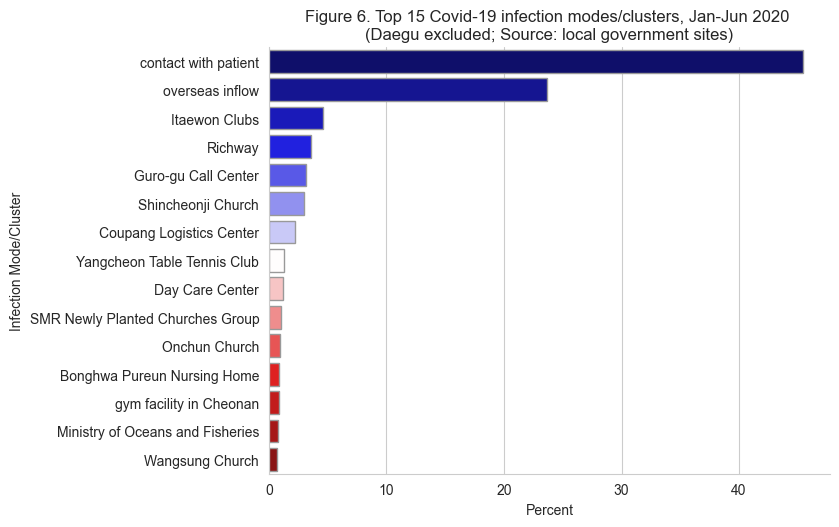

In [14]:
# Infection mode

fig = plt.figure(figsize=(6, 3.7))

# drop missing (-1) and non-meaningful values (etc)
pt_info_inf = pt_info[
    ((pt_info["infection_case"] != "missing") & (pt_info["infection_case"] != "etc"))
]

# create df showing percentage of top 15 values
infect_mode = (
    pt_info_inf[["infection_case"]]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percent")
    .reset_index()
)

infect_mode = infect_mode.nlargest(15, "percent")

# Visualise as barchart
ax = sns.catplot(
    data=infect_mode,
    x="percent",
    y="infection_case",
    kind="bar",
    palette="seismic",
    edgecolor=".6",
    aspect=1.7,
).set(
    title="Figure 6. Top 15 Covid-19 infection modes/clusters, Jan-Jun 2020 \n(Daegu excluded; Source: local government sites)"
)

ax.set_axis_labels("Percent", "Infection Mode/Cluster")
plt.show()

<span style="color:blue">
    
#### **_Findings: Infection Mode/Cluster_**</span>

* By far the most common modes of infection were from overseas and through "contact with patient." The latter presumably means that the specific patient contacted is known, and that it is an individual, as opposed to an infection cluster.
* While the PatientInfo dataset is incomplete, the top infection clusters nevertheless demonstrate how the infection spread among facilities targeting different age groups:
    - Mixed age groups: 4 churches 
    - Young children: 1 daycare center
    - Active adults: 1 club area, 3 workplaces (call center, government ministry complex, logistics center), 2 exercise venues: gym, tennis club
    - Senior citizens: Richway sales company, nursing home

* **Policy implications:** 
    * The data speak to the importance of implementing policies early in a similar epidemic to reduce transmission through overseas inflow (eg. restriction of travel flow from specific countries, mandatory isolation for such travellers etc) and contact with "patients" (ie. promotion of social distancing, masking etc). 
    * Such policies included (from Section 1.6.2):
        * To reduce overseas inflow:
            - February: travel restriction policies .
        * To reduce contact with persons with confirmed infections:
            - March: social distancing campaign
            - April: mandatory 14-day quarantine for travellers, online classes for school children

<span style="color:blue">

### **_Time series of confirmed cases_**</span>



In [15]:
# Read Time.csv data
time = pd.read_csv(
    "Time.csv",
    header=0,
    parse_dates=["date"],
    date_parser=pd.to_datetime,
    dayfirst=True,
)

# Create daily case variable corresponding to accumulated cases
colour_list3 = ["#CD2E3A", "#0047A0", "#ffff00"]
covid_progress_cols4 = ["test", "confirmed", "released", "deceased"]
covid_progress_labels4 = ["Tested", "Confirmed", "Released", "Deceased"]

for col in covid_progress_cols4:
    time[f"{col}_d"] = time[col].diff().fillna(time[col])

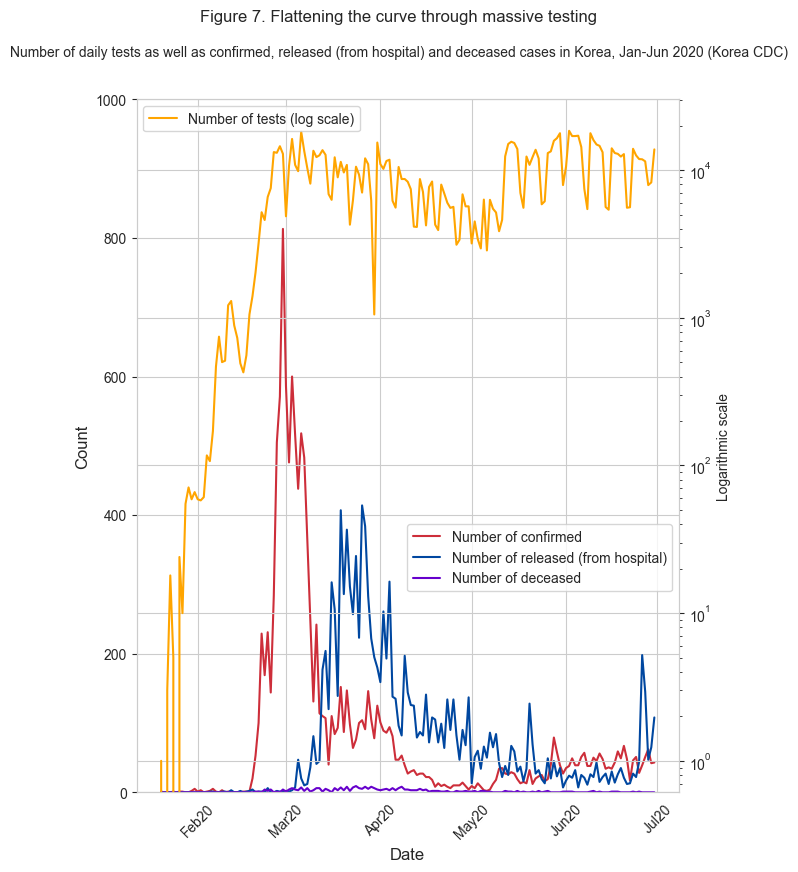

In [16]:
# Viz: Time series of tested, confirmed, released and deceased

fig, ax = plt.subplots(figsize=(7, 9))
fig.suptitle(
    "Figure 7. Flattening the curve through massive testing",
    fontsize=12,
)

fig.text(
    0.5,
    0.95,
    "\n\nNumber of daily tests as well as confirmed, released (from hospital) and deceased cases in Korea, Jan-Jun 2020 (Korea CDC)",
    fontsize=10,
    ha="center",
    va="center",
)
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Count", size=12)

label_list = [
    "Number of confirmed",
    "Number of released (from hospital)",
    "Number of deceased",
]
colour_list = [
    "#CD2E3A",
    "#0047A0",
    "#6600cc",
    "#ffff00",
    "#404040",
]

columns = [0, 1, 2]

for col in columns:
    sns.lineplot(
        data=time,
        x="date",
        y=time.columns[col + 8],
        ax=ax,
        label=label_list[col],
        color=colour_list[col],
    )

ax.set_xticks(
    [
        "2020-01-01",
        "2020-02-01",
        "2020-03-01",
        "2020-04-01",
        "2020-05-01",
        "2020-06-01",
        "2020-07-01",
    ]
)
ax.set_xticklabels(
    ["Jan20", "Feb20", "Mar20", "Apr20", "May20", "Jun20", "Jul20"], rotation=45
)
ax.set_ylim([0, 1000])

ax2 = ax.twinx()
ax2.set_yscale("log")
ax2.set_ylabel("Logarithmic scale")
sns.lineplot(
    data=time,
    x="date",
    y="test_d",
    ax=ax2,
    label="Number of tests (log scale)",
    color="orange",
)
ax.legend(["Nbr of confirmed", "Nbr released from hospital", "Nbr of deceased"])
ax.legend(loc="lower right", bbox_to_anchor=(1, 0.28))
ax2.legend(loc="upper left", bbox_to_anchor=(0, 1))

<span style="color:blue">

#### **_Findings: Testing policy_**</span>

* This chart shows how testing was successfully initiated early and increased exponentially, while the number of confirmed and released cases decreased simultaneously from January to June 2020. Had there been no infection prevention measures, we might have expected the number of cases to also increase exponentially. 
* These data show how the Korean government's response was able to reduce the number of cases over the six month period. While this decrease cannot be attributed to testing alone, without widespread availability of testing, it would not have been possible to identify cases, isolate them or conduct contact tracing. The successful scaling up of testing enabled the containment (isolation) of cases and contact tracing. 
* **Policy implications**
    - This scale up of testing was enabled via an Emergency Use Authorisation of Diagnostic Kit process initiated in February, which allowed for unapproved COVID-19 diagnostic test kits to be produced, distributed and used for a limited time period without approval as a medical device (see detailed list of policies in Section 1.6.2). 
    Source: https://www.mfds.go.kr/eng/brd/m_75/view.do?seq=16&srchFr=&srchTo=&srchWord=&srchTp=&itm_seq_1=0&itm_seq_2=0&multi_itm_seq=0&company_cd=&company_nm=&page=1

In [17]:
# Stacked columns of confirmed & released & deceased people 
# Read data
time_prov = pd.read_csv(
    "TimeProvince.csv",
    header=0,
    parse_dates=["date"],
    date_parser=pd.to_datetime,
    dayfirst=True,
)

# Number of provinces in dataset
num_prov = len(time_prov["province"].unique())
print(f"Nbr of provinces: {num_prov}")  # 17

time_prov

# Find max value for each province for all columns
prov_max = (
    time_prov.groupby("province")
    .max()
    .sort_values("confirmed", ascending=False)
    .reset_index()
)

# Prep data for stacked bars: wide to long
prov_max_long = pd.melt(
    prov_max,
    value_vars=["confirmed", "released", "deceased"],
    value_name="variable",
    var_name="cases",
    id_vars="province",
)

Nbr of provinces: 17


In [21]:
# Create stacked bars
color_map = {"confirmed": "#CD2E3A", "released": "#0047A0", "deceased": "#6600cc"}

fig = px.bar(
    prov_max_long,
    x="variable",
    y="province",
    color="cases",
    barmode="stack",
    color_discrete_map=color_map,
)

In [ ]:
fig.update_layout(yaxis_categoryorder="total ascending")
fig.update_layout(
    title="Figure 8. Number of confirmed, released and deceased cases, by province Jan-Jun 2020 <br>(Korea CDC)",
    title_x=1,
    xaxis_title="Number of Cases",
    yaxis_title="Province",
    margin=dict(l=100, r=20, t=70, b=70),
    height=500,
    width=800,
    legend=dict(x=0.8, y=0.1),
)

fig.show("png")

<span style="color:blue">

#### **_Findings: Cases by province_**</span>

* Cases were concentrated in four provinces, with Daegu hosting over four times the number of confirmed cases as the next province. Inspecting provincial-level data may shed light on how case numbers changed over time.

<span style="color:blue">
    
### **_Number of confirmed, released and deceased cases in the four provinces with highest numbers of confirmed cases (January-June 2020)_**</span>

In [ ]:
# Define lists to be used
covid_progress_cols3 = ["confirmed", "released", "deceased"]

# Read time_prov.csv data (refactored)
time_prov = pd.read_csv("TimeProvince.csv")

# Identify top 4 provinces by total # of confirmed
top4conf = time_prov.groupby("province")["confirmed"].max().sort_values(ascending=False)
top4conf = top4conf.iloc[:4].sort_values(ascending=False)

# Extract province names
top4list = top4conf.index.tolist()
top4list  # 'Daegu', 'Gyeongsangbuk-do', 'Seoul', 'Gyeonggi-do'

# Create dataset with only top 4 provinces
time_4prov = (
    time_prov[time_prov["province"].isin(top4list)]
    .sort_values(["province", "date"])
    .reset_index()
)

# Create prov variable with shortened name for provinces
time_4prov["prov"] = time_4prov["province"].str[-5:]
prov_list = time_4prov["prov"].unique()
prov_list  # ['Daegu', 'gi-do', 'uk-do', 'Seoul']

In [ ]:
# Create daily count variables from accumulated variables for "confirmed," "released," and "deceased"
for col in covid_progress_cols3:
    time_4prov[f"{col}_d"] = time_4prov[col].diff().fillna(time_4prov[col])

# Data cleaning: there are negative values created
# List all rows with negative values and investigate why
rows_neg = time_4prov.loc[
    (time_4prov["confirmed_d"] < 0)
    | (time_4prov["released_d"] < 0)
    | (time_4prov["deceased_d"] < 0)
]

<span style="color:blue">
    
#### **_Notes on data cleaning: TimeProvince dataset_**</span>

* Creation of daily count variable for "confirmed," "released," and "deceased" variables resulted in negative values
* Two types of negative values: 
    * (1) values created on rows on date 2020-01-20, which are artifact of .diff() method
        * Action: Correct negative values to zero (0)
    * (2) negative values in "daily count" variables that are simply the result of the fact that values in the "cumulative count" variable sometimes decreases, which technically would not occur with a cumulative count variable.
        * Action: Correct negative values to zero (0) because: (1) the negative values were likely the result of corrections made to the original dataset, but there is no way of knowing which previously incorrect data led to the needed correction, and (2) the frequency and magnitude of the negative values was overall low.

In [ ]:
# Change negative values in confirmed_d, released_d and deceased_d to 0
## Identify first observation for each province
min_prov_date = time_4prov.groupby("province")[["date", "confirmed_d", "released_d", "deceased_d"]].min()

min_prov_date  # confirm that 3 columns have negative values due to construction of .diff()

## Replace 1st observation for each prov (ie. negative values) by 0
time_4prov.loc[
    time_4prov["date"] == "2020-01-20", ["confirmed_d", "released_d", "deceased_d"]
] = 0

time_4prov.loc[time_4prov["date"] == "2020-01-20", "released_d"] = 0

## Check if replacements correctly made
time_4prov[time_4prov["date"] == "2020-01-20"]  # replacements confirmed!

# Identify negative values for released_d and deceased
time_4prov[time_4prov["released_d"] < 0] = 0
time_4prov[time_4prov["deceased_d"] < 0] = 0

# Confirm no negative rows
rows_neg = time_4prov.loc[
    (time_4prov["confirmed_d"] < 0)
    | (time_4prov["released_d"] < 0)
    | (time_4prov["deceased_d"] < 0)
]
rows_neg  # no negative rows: confirmed

In [ ]:
# Construct line charts for the 4 provinces/metro areas with highest number of confirmed cases

# Define lists for charts
province_list = ["Daegu", "Gyeongsangbuk-do", "Seoul", "Gyeonggi-do"]
covid_data_order = ["confirmed_d", "released_d", "deceased_d"]

# Viz: Time series of tested, confirmed, released and deceased

fig, axes = plt.subplots(1, 4, figsize=(20, 7), sharey=True)

fig.suptitle(
    "Figure 9. Number of daily tests, confirmed, released (from hospital) and deceased cases in the four provinces with highest confirmed cases, Jan-Jun 2020 \n(Korea CDC)",
    fontsize=18,
    y=1.03,
)

label_list = [
    "Number of confirmed",
    "Number of released (from hospital)",
    "Number of deceased",
]
colour_list = [
    "#CD2E3A",
    "#0047A0",
    "#6600cc",
]

xtx_feb_jul = [
    "2020-02-01",
    "2020-03-01",
    "2020-04-01",
    "2020-05-01",
    "2020-06-01",
    "2020-07-01",
]

xtxlbl_feb_jul = ["Feb20", "Mar20", "Apr20", "May20", "Jun20", "Jul20"]

for df in range(4):
    axes[df].set_xlabel("Date", size=12)
    axes[df].set_ylabel("Count", size=12)
    for col in range(3):
        sns.lineplot(
            data=time_4prov[time_4prov["province"] == province_list[df]],
            x="date",
            y=covid_data_order[col],
            ax=axes[df],
            label=label_list[col],
            color=colour_list[col],
        )
    axes[df].set_xticks(xtx_feb_jul),
    axes[df].set_xticklabels(xtxlbl_feb_jul, rotation=45)
    axes[df].set_title(province_list[df])
    plt.tight_layout()

<span style="color:blue">
    
#### **_Findings at the provincial level_** </span>
* The previous two charts demonstrate how the Korean response to the pandemic was able to successfully contain outbreaks. Daegu, the city with multiple times the number of confirmed cases as the next highest province, experienced a spike in confirmed cases between late February and early March, reaching over 600 cases per day. Assuming testing frequency did not change, the numbers quickly decreased within a two-week period. Gyeongsangbuk-do is the province in which Daegu is located--it experienced an outbreak, but this was also contained in a short period. 

**Policy implications:**
* Assuming no additional measures were taken in Daegu that were different from the rest of the country, government systems implementing national policies in February and March (Section 1.7.2) successfully prevented the Daegu outbreak to spread. 

<span style="color:blue">
    
### **_Covid-19 epidemic control policies_** </span>

**Data cleaning notes/Assumption**
* In the original Policy.csv dataset, an end date was not provided for over half the policies. For this analysis, we assumed the policies implemented were active until the end of the period and visualised them accordingly in this report.

In [ ]:
# Read data and convert date columns into correct format
policy_gantt = pd.read_csv(
    "policy.csv",
    header=0,
    parse_dates=["start_date", "end_date"],
    dayfirst=True,
)

# Create new column for gov_policy that uses shortened wording (so that it fits into Gantt)

policy_gantt["gov_pol"] = policy_gantt["gov_policy"]

policy_gantt.loc[
    policy_gantt["gov_pol"] == "Emergency Use Authorization of Diagnostic Kit",
    "gov_pol",
] = "EUA of diagnostic kit"

policy_gantt.loc[
    policy_gantt["gov_pol"] == "Education School Opening with Online Class",
    "gov_pol",
] = "Online Class"

policy_gantt.loc[
    policy_gantt["detail"]
    == "Gathering limited administrative orders for nursing homes, nursing homes, elderly day care centers and mental hospitals used by vulnerable groups",
    "detail",
] = "Limit gatherings \nat institutions for elderly."

policy_gantt.loc[
    policy_gantt["detail"]
    == "new quick response (QR) code system this week to log visitors at high-risk entertainment facilities, restaurants and churches in a bid to track coronavirus cases and prevent further spread of the disease",
    "detail",
] = "QR code @restaurants, churches, etc"

policy_gantt.loc[
    policy_gantt["detail"] == "administrative order to close bars and clubs",
    "detail",
] = "Admin order: close bars, clubs"

policy_gantt.loc[
    policy_gantt["detail"]
    == "Ban on gathering for 2 weeks for all karaoke and coin karaoke",
    "detail",
] = "Ban karaoke"

policy_gantt.loc[
    policy_gantt["detail"] == "on people who violate self-quarantine measures",
    "detail",
] = "Self-quarantine violators"

policy_gantt.loc[
    policy_gantt["gov_pol"] == "local government Administrative orders",
    "gov_pol",
] = "Admin orders"

policy_gantt.loc[
    policy_gantt["gov_pol"] == "Extends Tightened Quarantine Measures",
    "gov_pol",
] = "Extended quarantine measures"

policy_gantt.loc[
    policy_gantt["detail"]
    == "Gov't Extends Tightened Quarantine Measures in Seoul Metro Area",
    "detail",
] = "Seoul Metro"

policy_gantt.loc[
    policy_gantt["gov_pol"] == "KI-Pass: Korea Internet - Pass",
    "detail",
] = "KI-Pass"

policy_gantt.loc[
    policy_gantt["gov_pol"] == "Wearing of masks",
    "gov_pol",
] = "Masks"

policy_gantt.loc[
    policy_gantt["detail"]
    == "Drivers such as buses and taxis can refuse to ride passengers without masks",
    "detail",
] = "Bus & taxi drivers can refuse unmasked passengers"

policy_gantt.loc[
    policy_gantt["detail"]
    == "Mandatory wearing of passenger mask domestic, international teminal in the airport",
    "detail",
] = "Mandatory @airports"

policy_gantt.loc[
    policy_gantt["gov_pol"] == "School Opening with Online Class",
    "gov_pol",
] = "School online"

policy_gantt.loc[
    policy_gantt["detail"] == "High School",
    "detail",
] = "HS"

policy_gantt.loc[
    policy_gantt["detail"] == "Middle School",
    "detail",
] = "MS"

policy_gantt.loc[
    policy_gantt["detail"] == "Elementary School (5th ~ 6th grade)",
    "detail",
] = "Grades 5, 6"

policy_gantt.loc[
    policy_gantt["detail"] == "Elementary School (4th grade)",
    "detail",
] = "Grade 4"

policy_gantt.loc[
    policy_gantt["detail"] == "Elementary School (3rd grade)",
    "detail",
] = "Grade 3"

policy_gantt.loc[
    policy_gantt["detail"] == "Elementary School (1st ~ 2nd grade)",
    "detail",
] = "Grades 1, 2"

policy_gantt.loc[
    policy_gantt["detail"]
    == "On-site inspection of major logistics facilities such as courier terminals and warehouses",
    "detail",
] = "Onsite inspections"

policy_gantt.loc[
    policy_gantt["detail"] == "Standard Operating Procedures",
    "detail",
] = "Standard"

policy_gantt.loc[
    policy_gantt["detail"] == "",
    "detail",
] = ""

policy_gantt.loc[
    policy_gantt["detail"] == "",
    "detail",
] = ""

policy_gantt.loc[
    policy_gantt["detail"] == "",
    "detail",
] = ""

In [ ]:
# Gantt chart for 24 gov policies
fig = px.timeline(
    policy_gantt,
    x_start="start_date",
    x_end="end_date",
    y="gov_policy",
    color="type",
)

# Observation: policies with None as end_date do not show up on Gantt--substitute last timeline date as policy end_date
policy_gantt["end_date"] = policy_gantt["end_date"].fillna("2020-06-14")

# Build Gantt chart
fig.update_xaxes(tickangle=-45)
fig.update_yaxes(autorange="reversed")
fig.update_layout(
    title="Figure 10. Summary of 24 Korean government Covid-19 policies, Jan-Jun 2020",
    title_x=0.9,
    xaxis_title="Month",
    yaxis_title="Policy",
    height=700,
    width=900,
)

In [ ]:
# Gantt chart for 24 gov policies
fig = px.timeline(
    policy_gantt,
    x_start="start_date",
    x_end="end_date",
    y="gov_policy",
    color="type",
)

# Observation: policies with None as end_date do not show up on Gantt--substitute last timeline date as policy end_date
policy_gantt["end_date"] = policy_gantt["end_date"].fillna("2020-06-14")

# Convert timedelta to date strings
fixed_date = pd.to_datetime("2020-01-01")
policy_gantt["start_date"] = (fixed_date + pd.to_timedelta(policy_gantt["start_date"], unit='D')).dt.strftime("%Y-%m-%d")
policy_gantt["end_date"] = (pd.to_datetime("2020-01-01") + pd.to_timedelta(policy_gantt["end_date"], unit='D')).dt.strftime("%Y-%m-%d")

# Build Gantt chart
fig.update_xaxes(tickangle=-45)
fig.update_yaxes(autorange="reversed")
fig.update_layout(
    title="Figure 10. Summary of 24 Korean government Covid-19 policies, Jan-Jun 2020",
    title_x=0.9,
    xaxis_title="Month",
    yaxis_title="Policy",
    height=700,
    width=900,
)


<span style="color:blue">

#### **_Gantt chart_** </span>
* A more detailed summary of government COVID-related policies is available in Section 1.7.2. 



<span style="color:blue">

## **_Part V: Findings, Conclusions and Recommendations_**

### **_Findings: Critical insights from data analysis_**</span>  

**Epidemic control measures were effective** 
* In the absence of control measures, airborne epidemics spread exponentially, so the overall low number of confirmed cases and deaths demonstrate that epidemic control measures successfully identified, isolated and monitored cases to limit spread of the infection. 
* In addition, provincial-level data from the provinces/metro areas with highest number of confirmed cases during the target period demonstrated how an outbreak in one province (Daegu) in late February/early March spiked case numbers--and was followed by an equally steep decline in numbers of cases. Furthermore, cases in the province with next highest number of cases for the same period only reached a fraction of the number of cases. 

**Key response strategies were: massive testing, isolation of cases, and aggressive contact tracing**
While it is not possible to attribute this success to any one part of the infection control strategy, we can draw attention to policies that enabled it (Source: (4)), including:
- **Testing** Early, fast and free testing facilitated via an Emergency Use Authorisation of Diagnostic Kit programme. Testing volume exponentially increased during the six-month period, with accelerated scale up in the month of February (ie preceding the Daegu outbreak).
- **Isolation** Isolation and monitoring of confirmed cases (mandatory hospitalization for severe cases)
- **Contact tracing** Aggressive, high tech contact tracing strengthened through an open data policy and cooperative private sector and citizens (February). 
- **Controlled inflow of cases** Early (February) implementation of policies to control potential inflow of cases from other countries, and mandatory 14-day quarantine for arrivals (April)
- **Information systems** A unified and coordinated government response using a single information system for tracking and monitoring cases.

These measures contrast with that of the US response:
- **Testing** Testing was delayed by weeks because of Emergency Use Authorization red tape, a lack of a nationalised health-care system using the same equipment in all hospitals, inconsistent government messenging on testing, test manufacturing and distributing issues before February 28th
- **Isolation** CDC issued recommendations for isolation of COVID-19 cases were issued but the government did not assure isolation via monitoring, facilitation (eg. via government-supporated dormitories or hospitals as in Korea) or otherwise enforced. 
- **Contact tracing** Inconsistently funded and executed contact tracing programme, implemented by local governments, instead of a coordinated national system. Anecdotally, my local city government relied heavily on volunteers to support basic testing and vaccination efforts in 2020 and 2021.
- **Controlled inflow of cases** Policies limiting inflow of cases from other countries were not consistently implemented or enforced, with social distancing measures not respected at airports as late as March (anecdotal and personal experience).
- **Information systems** Absence of clear federal guidelines on how, what and where to publish data and lack of unified official source for testing data leading to reliance on volunteer and academic sources. For example, the COVID Tracking Project, launched in March 2020,* relied on volunteers who manually entered data from screenshots of state dashboards (Sources: (5)). The CDC released their first dashboard with state-by-state breakdowns of cases and testing in May 2020, two months later. 
- **Additional barriers:** 
    - Lack of national COVID-19 strategy for states to follow. Each state was responsible for developing its own COVID-19 response plan (Sources (6)). In the context of differentially and inconsistently implemented epidemic control approach, local government investments in such activities as contact tracing could be compared to bailing out a sinking ship with a bucket. 
    - Fragmented and poorly funded public health systems
    - Inconsistent government messenging on the importance of testing and isolation, and masking. 
    - Politicization of public health. The head of state repeatedly undermined government COVID-19 Response Team messenging, for example suggesting that COVID-19 might simply disappear on its own via herd immunity.


<span style="color:blue">
    
### **_Conclusions_**</span>

South Korea's current system was built from the hard-earned lessons from previous SARS outbreak, the 2009 H1N1, and most importantly, the 2015 MERS epidemic (Source: (4)). Similarly, the COVID-19 epidemic is a learning opportunity for the US. The death toll from COVID-19 could have been--and could still be--far worse, depending on the lethality of the circulating COVID-19 variant. The example of Korea demonstrates how, in the context of a controlled epidemic, policies protecting the general public successfully protected one of the most vulnerable groups. Among the 24 policies reviewed, only one pertained specifically to protect the elderly. Yet the total number of deaths during this period remained relatively flat.

There are many ways the US response could be improved, including many issues that are quite specific to the US context, such as the issues detailed under the _Additional barriers_ section. Korea's controlled epidemic response cannot inform in all such areas, and certain approaches are likely to not be successful if directly replicated in the US. In particular, if the politicization of public health continues, the US response could be even more fragmented than in 2020, and the country will likely need to have a robust plan for an _uncontrolled_ epidemic, simply because of the low likelihood of confronting a controlled epidemic for very long. Regardless, flattening the curve will still save lives, and strengthening the capabilities listed below should contribute to that effect.

<span style="color:blue">
    
### **_Recommendations: Key points in plan to fight the next pandemic in the United States_**</span>
Detailed recommendations are forthcoming in the in-depth analysis report, which will be prepared with our health policy team, and it will include a more detailed comparison between the US and Korea COVID-19 responses. Meanwhile, we recommend that the following system capabilities be included in the plan for responding to the next pandemic:

**Federal government**
* **Testing:** plan system for accelerated development, design, manufacturing, and distribution of accurate tests with rapid turnaround times.
* **Information systems:** guidelines for state epidemic reporting (eg. test positivity rates)
* **Isolation**: _enforcement_ of infection prevention measures at airports and other ports of entry

**State and local government**
* **Contact tracing:** capacity to trace COVID-19 case contacts 
* **Isolation:** 
    - strategy to better incentivize and/or monitor isolation of COVID cases during severe outbreaks
    - capacity to monitor and enforce mandatory isolation/quarantine measures (eg. using phone apps for self-report)
* **Coordination:** Mobilize network of state government and institutional partners such as universities to learn from the most successful statewide strategies for case identification, isolation and contact tracing implemented in the first six months of 2020 and update a joint epidemic preparedness plan. Such a plan should include a recommended prototype of what state plans should include, such as standard measures and thresholds for closing state borders. 
* **Information systems:** Capability to closely monitor for and respond to outbreaks among higher risk groups, such as the elderly, front-line workers, lower income and immigrant groups, people with chronic diseases and men. Response plans may include mobile and other outreach testing (eg. at barbers), food delivery, alternative ways to congregate or conduct errands without increasing risk of infection etc. 


<span style="color:blue">

## **_Part VI: How this analysis can be improved_** </span>

* Present demographic information on confirmed cases and deaths in the form of _proportion_ of the population with specific characteristics, rather than frequencies. While population data were not readily available to serve as denominators, the Ministry of the Interior and Safety website provides such information: https://27.101.213.4/. 
* Integrate data representing the comparable data (ie. numbers of confirmed cases and deaths for the US) for comparison purposes, though the US data would be very incomplete 
* Integrate Korea and US Covid-related policies during the January - June 2020 period. 
* Integrate a visualisation that shows policies and evolution of cases for both the US and Korea.
* If we had access to resources to gather additional data, it would also be interesting to gather qualitative data on the locations where larger outbreaks ocurred, to better understand policy implementation gaps.

<span style="color:blue"> 

## **_Part VII: Appendices_** </span>

<span style="color:blue">
   
### **_Data cleaning note: comparison of number of confirmed cases in PatientInfo vs Time datasets:_**</span>

In [ ]:
# Construct variable for accumulated # of confirmed cases from PatientInfo dataset for comparison
conf_by_date = pt_info.groupby("confirmed_date")[["patient_id"]].count()
conf_by_date.rename(columns={"patient_id": "count"}, inplace=True)
conf_by_date["cum_cases"] = conf_by_date["count"].cumsum()

# Read Time.csv data
time = pd.read_csv(
    "Time.csv",
    header=0,
    parse_dates=["date"],
    date_parser=pd.to_datetime,
    dayfirst=True,
)

# Comparison of total confirmed via calculation (PatientInfo dataset) vs "confirmed" variable in Time dataset (which measures accumulated cases)

ttl_confirmed = conf_by_date.sum()
display(ttl_confirmed)  # 5162 total confirmed cases in PatientInfo dataset

time[
    "confirmed"
].max()  # 12800 confirmed cases in Time dataset (the confirmed variable measures accumulated cases)

<span style="color:blue">
    
#### **_Discrepancy in number of confirmed cases in two datasets_**</span>

* Early in the exploratory analysis phase, the comparison above (ie 5162 confirmed cases in the PatientInfo dataset vs 12800 cases in the Time dataset) led to the search for an explanation in the Kaggle documentation--this is what led to the finding that Daegu data in the PatientInfo dataset are incomplete.

<span style="color:blue">

### **_Covid-19 epidemic control policies (detailed version)_** </span>


In [ ]:
policy_gantt["policy_detail"] = policy_gantt["gov_pol"] + ": " + policy_gantt["detail"]

len(policy_gantt["gov_policy"].unique())  # 24 unique values

# Gantt chart for detailed policy
fig = px.timeline(
    policy_gantt,
    x_start="start_date",
    x_end="end_date",
    y="policy_detail",
    color="type",
)
fig.update_xaxes(tickangle=-45)
fig.update_yaxes(autorange="reversed")
fig.update_layout(
    title="Figure 11. 24 Korean government Covid-19 policies (detailed), Jan-Jun 2020",
    title_x=0.9,
    xaxis_title="Month",
    yaxis_title="Policy",
    height=1300,
    width=1000,
)

<span style="color:blue">

## **_Part VIII: Sources:_**</span>

(1) South Korea's responses to stop the COVID-19 pandemic. Am J Infect Control. 2020 Sep; 48(9): 1080–1086. Published online 2020 Jun 6. doi: 10.1016/j.ajic.2020.06.003
PMCID: PMC7834720. PMID: 32522606. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7834720/

(2) U.S. federal government response to the COVID-19 pandemic. https://en.wikipedia.org/wiki/U.S._federal_government_response_to_the_COVID-19_pandemic 

(3) Emerging COVID-19 success story: South Korea learned the lessons of MERS https://ourworldindata.org/covid-exemplar-south-korea 

(4) Thompson Derek. What’s Behind South Korea’s COVID-19 Exceptionalism? The Atlantic, 2020-05-06. https://www.theatlantic.com/ideas/archive/2020/05/whats-south-koreas-secret/611215/

(5) https://covidtracking.com/analysis-updates/why-we-didnt-automate-our-data-collection

(6) https://www.cdc.gov/mmwr/volumes/69/wr/mm6935a2.htm 
